In [63]:
import pandas as pd
import numpy as np
from functions import summarize

#to do:
#import music signal from librosa
#transform wave to make it all positive

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df

,Unnamed: 0,id,spam,commentCount,dislikeCount,likeCount,viewCount,defaultAudioLanguage_.,defaultAudioLanguage_GB,defaultAudioLanguage_US,defaultAudioLanguage_en,defaultAudioLanguage_hi,defaultAudioLanguage_it,defaultAudioLanguage_zxx,likeToViews,dislikeToViews,commentToViews
0,0,KH-i2P92bS4,1,421,1009,3747,93583,0,0,0,0,0,0,1,4.003932,1.078187,0.449868
1,1,ix1vK9-9rUw,1,466,9,329,3065,1,0,0,0,0,0,0,10.734095,0.293638,15.203915
2,2,UZ4OrJHDpi0,1,1147,20,511,6129,1,0,0,0,0,0,0,8.337412,0.326318,18.714309
3,3,6wqiOt0HO_c,1,541,20,438,5316,1,0,0,0,0,0,0,8.239278,0.376223,10.176825
4,4,B80XsS6uvP8,1,415,18,743,9086,1,0,0,0,0,0,0,8.177416,0.198107,4.567466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,122,-dBwZdc_c0M,2,4917,65,11535,375229,0,0,0,1,0,0,0,3.074123,0.017323,1.310400
122,123,Co0_HVab0vw,2,9455,86,10974,102265,0,0,0,1,0,0,0,10.730944,0.084095,9.245587
123,124,VBozk2qZEpg,2,436,23,2578,44388,0,0,0,1,0,0,0,5.807876,0.051816,0.982247
124,125,PC54M2M4hB0,2,262,1,451,3429,0,0,0,1,0,0,0,13.152523,0.029163,7.640712


In [4]:
comments=df["commentCount"].to_numpy()
likes=df["likeCount"].to_numpy()

In [12]:
likes

array([  3747,    329,    511,    438,    743,    789,     46,    123,
          101,     97,     61,    581,    538,   1445,   1437,    717,
         9204,  18355,  12368,  11551,  13436,   6677,   6252,   6737,
         5575,   7119,    887,    249,   2889,    478,    534,   2651,
         2211,   4434,   5449,   2316,   7691,  12167,  22729,  18932,
         7982,  30658,     71,      0,     29,    233,  27613,      3,
           31,     12,     10,     13,      1,     21,     34,   1026,
           50,      4,     11,    605,      7,      0,     36,     11,
            3,     60,      8,     29,      1,     29,  11227,   3490,
         5367,    500,  10726,  12968,   2316,  68340,   7381,    661,
          819,   1217,    870,    811,  72473,  84758,  94247, 317162,
       299738,  18088,  19350,  22703,  16716,  32688,   5955,  81142,
         6258,  17236,   8518,      0,     49,      1,    107,     23,
         1517,   1132,    224,    181,    725,      0,    123,   4014,
      

In [13]:
from scipy.fft import fft, ifft

In [16]:
fcomments= fft(comments)
flikes= fft(likes)


In [70]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

Y  = np.fft.fft(fcomments)
freq = np.fft.fftfreq(len(fcomments), 1)

pylab.figure()
pylab.plot( freq, numpy.abs(Y) )
pylab.figure()
pylab.plot(freq, numpy.angle(Y) )
pylab.show()

NameError: name 'fcomments' is not defined

In [54]:
#get magnitude spectrum
magnitude_spectrum_comments=np.abs(fcomments)
#get mag spectrum coeficient
mag=magnitude_spectrum_comments[0]
mag

210208.0

In [84]:
def plot_m_s(signal, title, sr):
    ft = np.fft.fft(signal)
    mag_spectrum=np.abs(ft)

    #plot mag spectrum

    frequency = np.linspace(0,sr,len(mag_spectrum))
    plt.plot(frequency, mag_spectrum)
    plt.xlabel("Frequency in Hz")
    plt.title(title)
    plt.show()


In [85]:
import matplotlib.pyplot as plt

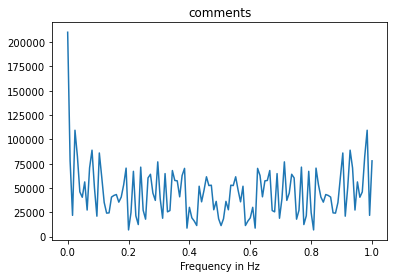

In [86]:
plot_m_s(comments, "comments", 1)

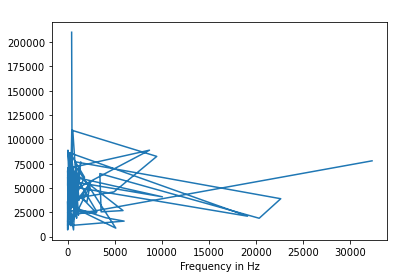

In [112]:

index=[]
for i in range (len(fcomments)):
    if i>0 and i<500:
        index.append(50)
    else:
        index.append(0)

ft = np.fft.fft(comments)
yt = ft + index
mag_spectrum=np.abs(ft)

#plot mag spectrum

frequency = np.linspace(0,1,len(mag_spectrum))

#plt.plot(frequency, mag_spectrum)
plt.plot(df["commentCount"].to_numpy(), mag_spectrum)
plt.xlabel("Frequency in Hz")
plt.title(" ")
plt.show()

In [101]:
ft[1]-yt[1]

(-5000+0j)

In [5]:
comments

array([  421,   466,  1147,   541,   415,   651,    15,    49,    97,
         164,    30,   142,   188,   193,   210,    99,  1106,  3050,
        1429,  1589,  2166,   492,   595,   685,   953,   621,   256,
          47,   774,    72,    91,   198,   129,   746,   311,   207,
         509,  1390,   942,   947,   675,  3101,    86,     0,    38,
          59, 10052,     0,    58,     6,     7,    39,     0,    33,
          21,   211,    11,     3,    22,   196,     7,     0,    51,
           0,     1,     3,     9,    52,     0,    13,    79,  2049,
        2348,   282,  5991,  4074,   577,  5106,  1005,   418,   554,
         990,   286,   405,  5874,  3551,  3415, 20323, 22610,   851,
        1202,   887,   922,  1303,   456,   249,   532,   265,   305,
           2,    13,     1,    14,    21,   573,   232,    44,    52,
         163,     0,    68,   541,  1789,   261, 19089,  1120,  8683,
         282,   176,  2471,  1450,  4917,  9455,   436,   262, 32297])

In [6]:
def totuple(a):
        return tuple(totuple(i) for i in a)

In [20]:
commentTuples=[]
commentList=list(df["commentCount"])
for i in range (len(commentList)-1):
    commentTuples.append((commentList[i],commentList[i+1]))


In [29]:
slopes=[]
for item in commentTuples:
    slopes.append(abs(item[0]-item[1]))


In [34]:
change_in_slope=[]
for i in range(len(slopes)-1):
    change_in_slope.append(abs(slopes[i]-slopes[i+1]))

In [46]:
from functions import summarize

count      124.000000
mean      1936.983871
std       4767.580587
min          0.000000
25%         49.500000
50%        280.000000
75%       1041.750000
max      31861.000000
Name: change, dtype: float64




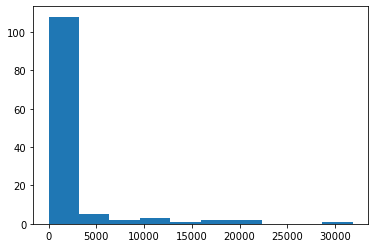

(array([108.,   5.,   2.,   3.,   1.,   2.,   2.,   0.,   0.,   1.]), array([    0. ,  3186.1,  6372.2,  9558.3, 12744.4, 15930.5, 19116.6,
       22302.7, 25488.8, 28674.9, 31861. ]), <BarContainer object of 10 artists>)


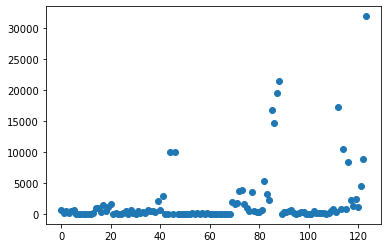

In [82]:
df=pd.DataFrame(change_in_slope, columns=["change"])
summarize(df,"change")

In [81]:
##############
#Summary Stats
##############
def summarize(dataframe,variable):
    #dependencies
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    #define arguments
    dfvar=dataframe[variable]
    description=dfvar.describe()
    print(description)
    print("\n")
    checkset=dataframe.dropna(subset=[variable])
    checkvar=dfvar.dropna().copy(deep=True)
    if (checkvar % 1  == 0).all()== True and len(set(checkvar))<10:
        cats=set(checkvar)
        print("Obs per category")
        print("------------------")
        for item in cats:
           count=len(dataframe.loc[dfvar == item])
           percent=round(count/len(dfvar)*100, 2)
           print(f"{item}-> {count} ({percent}%)")

        x = set(checkvar)
        heightlist=[]
        for value in x:
            heightlist.append(len(checkset.loc[checkset[variable] == value]))

        x_pos = [i for i, _ in enumerate(x)]
        plt.barh(x_pos, heightlist, color='green')
        plt.yticks(x_pos, x)
        plt.show()
        

    else:
        hist=plt.hist(dfvar, bins=10)
        plt.show()
        print(hist)
    
    plt.scatter([i for i in range(len(checkvar))], checkvar, s=None, c=None, marker=None)

In [71]:
import matplotlib.pyplot as plt

In [84]:
zerocount=0
for item in change_in_slope:
    if item ==0:
        zerocount+=1


In [85]:
zerocount

1